## MODELO LINEAL GENERALIZADO

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate, RepeatedKFold, ShuffleSplit, learning_curve
from scipy import stats
from sklearn.metrics import r2_score, median_absolute_error,mean_squared_error
from statsmodels import graphics

from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
pd.set_option("display.max_rows", 10)

In [2]:
#Importando conjunto de datos

cacao=pd.read_excel("TODAS LAS VARIABLES Y TOTAL.xlsx")

In [3]:
#Eliminar valores faltantes del conjunto de datos

cacao=cacao.dropna()

In [4]:
#Definir variables exógenas

x=cacao[[   "Uso eficiente del agua", "Transpiracion",
            "Diametro tronco (cm)",
            "P", "MO", "Na", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]

In [5]:
#Definir variable endógena

y=cacao[["Rendimiento"]]

### Histograma variable respuesta

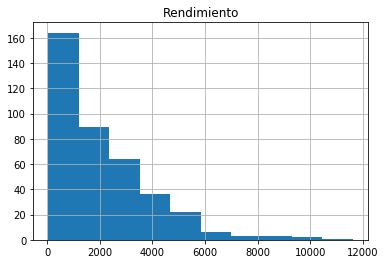

In [6]:
Respuesta=["Rendimiento"]
cacao.hist(Respuesta);

### Resultados predicción modelo lineal generalizado

In [7]:
glm_gamma = sm.GLM(y, x, family=sm.families.Gamma(link=sm.genmod.families.links.log))
glm_results = glm_gamma.fit()
print(glm_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Rendimiento   No. Observations:                  390
Model:                            GLM   Df Residuals:                      377
Model Family:                   Gamma   Df Model:                           12
Link Function:                    log   Scale:                         0.65833
Method:                          IRLS   Log-Likelihood:                -3308.5
Date:                Tue, 11 Dec 2018   Deviance:                       266.94
Time:                        10:12:17   Pearson chi2:                     248.
No. Iterations:                    20   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Uso eficiente del agua       0.0190      0.049      0.384      0.701      -0.078       0.116
Transpirac

In [8]:
glm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Rendimiento   No. Observations:                  390
Model:                            GLM   Df Residuals:                      377
Model Family:                   Gamma   Df Model:                           12
Link Function:                    log   Scale:                         0.65833
Method:                          IRLS   Log-Likelihood:                -3308.5
Date:                Tue, 11 Dec 2018   Deviance:                       266.94
Time:                        10:12:17   Pearson chi2:                     248.
No. Iterations:                    20   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Uso eficiente del agua       0.0190      0.049      0.384      0.701      -0.078       0.116
Transpiracion                0.1403      0.072      1.954      0.051      -0.000       0.281
Diametro tronco (cm)         0.0607      0.015      3.998      0.000       0.031       0.091
P                            0.9526      0.151      6.295      0.000       0.656       1.249
MO                          -0.5472      0.473     -1.157      0.247      -1.474       0.379
Na                          -2.1315      7.464     -0.286      0.775     -16.761      12.498
Mg                           2.9475      0.407      7.245      0.000       2.150       3.745
%A                          -0.2185      0.046     -4.777      0.000      -0.308      -0.129
%Hum/Grav                    0.4094      0.084      4.847      0.000       0.244       0.575
Radiacion                 6.091e-07   1.09e-07      5.587      0.000    3.95e-07    8.23e-07
Temperatura                 -0.2819      0.075     -3.774      0.000      -0.428      -0.135
Humedad                    -35.3668      4.657     -7.595      0.000     -44.494     -26.240
Lluvias acumuladas (mms)     0.0090      0.001      6.983      0.000       0.006       0.012
============================================================================================
"""

In [9]:
#R^2 predicción GLM

r2_score(y,glm_results.mu)

0.22842323294996336

### Cross validation

In [10]:
x=cacao[[   "Uso eficiente del agua", "Transpiracion",
            "Diametro tronco (cm)",
            "P", "MO", "Na", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]
y=cacao.Rendimiento

rkf=RepeatedKFold(n_splits=10,n_repeats=10) #la función RepeatkFolds permite crear una particion de datos y repetirla
R_2=[]
RMSE=[]
MAE=[]
for train_index, test_index in rkf.split(x):
    x2_train, x2_test = x.iloc[train_index], x.iloc[test_index]
    y2_train, y2_test = y.iloc[train_index], y.iloc[test_index] # Values toma la transformación de box-cox
    
    # Ajuste de los modelos
    glm_gamma=sm.GLM(y2_train,x2_train,family=sm.families.Gamma(link = sm.genmod.families.links.log))
    res=glm_gamma.fit()
    R_2.append(r2_score(y2_test,res.predict(x2_test)))
    RMSE.append(np.linalg.norm((y2_test-res.predict(x2_test)),2)/np.sqrt(len(y2_test)))
    MAE.append(median_absolute_error(y2_test,res.predict(x2_test)))

print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.1233
RMSE: 1685.0105
MAE: 1032.1257


### Hold out validation

In [11]:
x=cacao[[   "Uso eficiente del agua", "Transpiracion",
            "Diametro tronco (cm)",
            "P", "MO", "Na", "Mg",
            "%A", "%Hum/Grav",
            "Radiacion", "Temperatura", "Humedad", "Lluvias acumuladas (mms)" ]]
y=cacao.Rendimiento

R_2=[]
RMSE=[]
MAE=[]
pred=[0]
obs=[0]

for i in range(100):
    X1_train,X1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2) #Hacer partición de datos en entrenamiento y prueba

    glm_gamma=sm.GLM(y1_train,X1_train,family=sm.families.Gamma(link = sm.genmod.families.links.log))
    res=glm_gamma.fit()
    
    r_2=r2_score(y1_test,res.predict(X1_test))
    R_2.append(r_2)
    RMSE.append(np.linalg.norm((y1_test-res.predict(X1_test)),2)/np.sqrt(len(y1_test)))
    MAE.append(median_absolute_error(y1_test,res.predict(X1_test)))
    
    if r_2 >= max(R_2):
        pred[0] = res.predict(X1_test)
        obs[0] = y1_test
    
print("R^2: %.4f" % np.mean(R_2))
print("RMSE: %.4f" % np.mean(RMSE))
print("MAE: %.4f" % np.mean(MAE))

R^2: 0.1489
RMSE: 1700.0615
MAE: 1028.3121


In [12]:
pd.DataFrame(RMSE)

,0
0,1641.847703
1,1530.502958
2,1899.123329
3,1432.150642
4,1677.197373
...,...
95,1950.498318
96,1831.405079
97,1655.958878
98,1842.261050


In [13]:
df_RMSE = pd.DataFrame(RMSE)
df_RMSE.to_csv('RMSE_GLM_todas.csv', header=False, index=False)

In [14]:
#R^2 predicción GLM variables seleccionadas

r2_score(y1_train,res.predict(X1_train))

0.23810634000277853

<Figure size 432x288 with 0 Axes>

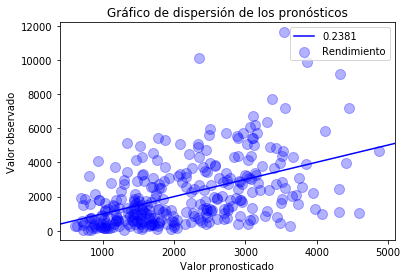

In [15]:
obs,pred = y1_train, np.array(res.predict(X1_train)).flatten() 

plt.figure("Diagrama de dispersión")
fig,ax=plt.subplots()
ax.scatter(pred,obs,s=100,alpha=0.3,c="b")
line_fit=sm.OLS(obs,sm.add_constant(pred,prepend=True)).fit()
abline_plot(model_results=line_fit,ax=ax,c="b",label=round(r2_score(obs,pred),4))
plt.xlabel("Valor pronosticado")
plt.ylabel("Valor observado")
plt.title("Gráfico de dispersión de los pronósticos")

plt.savefig("Dispersión pronósticos.jpg",dpi=110,bbox_inches="tight")

plt.legend()
plt.show()

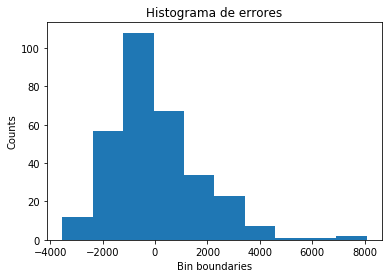

In [16]:
plt.hist(obs-pred)
plt.title("Histograma de errores")
plt.xlabel("Bin boundaries")
plt.ylabel("Counts");

### Evaluación residuales

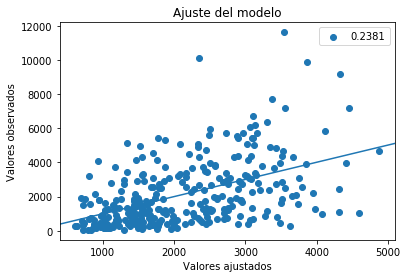

In [17]:
yhat=res.predict(X1_train)
y=y1_train

fig, ax = plt.subplots()
ax.scatter(yhat, y, label=round(r2_score(y,yhat),4))
line_fit = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)
plt.legend()

ax.set_title('Ajuste del modelo')
ax.set_ylabel('Valores observados')
ax.set_xlabel('Valores ajustados');

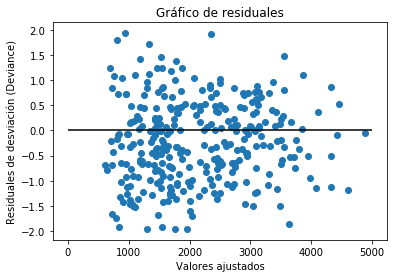

In [18]:
fig, ax = plt.subplots()

ax.scatter(yhat, res.resid_deviance)
ax.hlines(0, 0, 5000)
#ax.set_xlim(0, 1)
ax.set_title('Gráfico de residuales')
ax.set_ylabel('Residuales de desviación (Deviance)')
ax.set_xlabel('Valores ajustados');

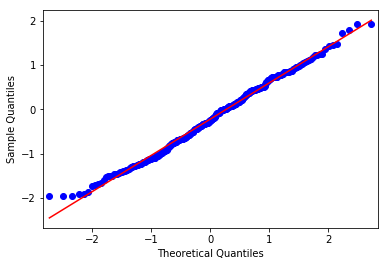

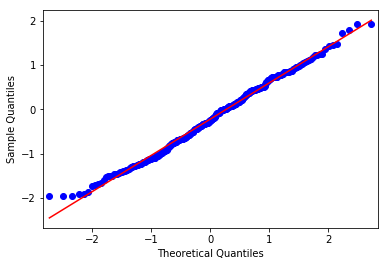

In [19]:
graphics.gofplots.qqplot(res.resid_deviance.copy(),line="r")

In [20]:
res.aic

5334.586010973354